# Transfer learning for Nieuwegein

In [1]:
installation_id="34DB760" #To be changed

In [3]:
from Models import models
from Data.Featurisation import data_handeler

## Case 1: NWP with no transformations

### Data intake

In [4]:
source_dataset, target_dataset, eval_dataset = data_handeler("ceda", "ceda", "ceda", transform=False, month_source=False)
min = source_dataset.min(axis=0).to_dict()
max = source_dataset.max(axis=0).to_dict()

### Train models

In [5]:
## PERSISTENCE
eval_persist = models.persistence(eval_dataset)

Shape of data:  torch.Size([1162, 24, 5]) torch.Size([291, 24, 5]) torch.Size([1162, 24, 1]) torch.Size([291, 24, 1])
Step 0: Average train loss: 0.0377 | Average test loss: 0.0343
Step 5: Average train loss: 0.0225 | Average test loss: 0.0245
Step 10: Average train loss: 0.0248 | Average test loss: 0.0274
Step 15: Average train loss: 0.0247 | Average test loss: 0.0275
Step 20: Average train loss: 0.0245 | Average test loss: 0.0275
Step 25: Average train loss: 0.0244 | Average test loss: 0.0275
Step 30: Average train loss: 0.0243 | Average test loss: 0.0275
Step 35: Average train loss: 0.0242 | Average test loss: 0.0272
Step 40: Average train loss: 0.0220 | Average test loss: 0.0240
Step 45: Average train loss: 0.0214 | Average test loss: 0.0238
Step 50: Average train loss: 0.0213 | Average test loss: 0.0237
Step 55: Average train loss: 0.0213 | Average test loss: 0.0238
Step 60: Average train loss: 0.0213 | Average test loss: 0.0238
Step 65: Average train loss: 0.0213 | Average test l

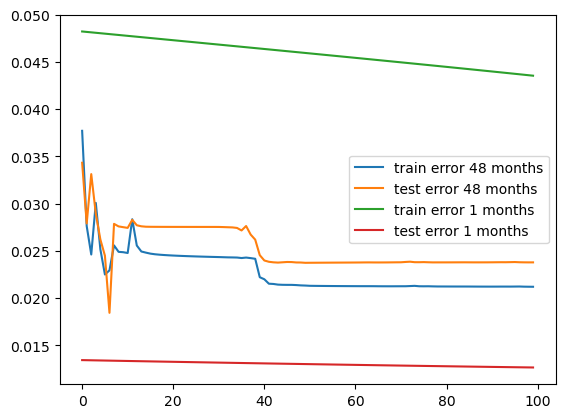

In [6]:
## TL (NO NWP)
features = ['P_24h_shift', "month_sin", "month_cos", "hour_sin", "hour_cos"]
target_state_dict, eval_no_nwp = models.TL(source_dataset, target_dataset, features, eval_dataset, [min, max])


In [ ]:
## TARGET (NO TL)
features = ['temperature_1_5m', 'relative_humidity_1_5m', 'diffuse_surface_SW_flux', 'direct_surface_SW_flux', 'downward_surface_SW_flux', 'P_24h_shift']
target_state_dict, eval_target = models.target(target_dataset, features, eval_dataset, [min, max])

In [ ]:
## TL
features = ['temperature_1_5m', 'relative_humidity_1_5m', 'diffuse_surface_SW_flux', 'direct_surface_SW_flux', 'downward_surface_SW_flux', 'P_24h_shift']
target_state_dict, eval_no_nwp = models.TL(source_dataset, target_dataset, features, eval_dataset, [min, max])


## Case 2: Transformations 